When the Success Sequence doesn't follow you back

In [2]:
import pandas as pd

import os
os.environ['X13PATH'] = '/home/brian/Documents/econ_data/micro/x13as/'

import re, struct
import numpy as np
from statsmodels.tsa.x13 import x13_arima_analysis

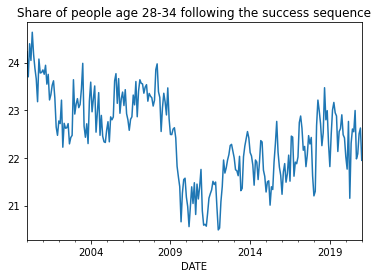

In [13]:
file = '/home/brian/Documents/CPS/data/clean/'
cols = ['YEAR', 'MONTH', 'AGE', 'FEMALE', 'EDUC', 'LFS', 'HRSUSL1I', 
        'CPSID', 'MARRIED', 'BASICWGT', 'WORKFT', 'PRCHLD']

kids = [3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

df = pd.concat([pd.read_feather(f'{file}cps{year}.ft', columns=cols) for year in range(2000, 2022)])
ss = lambda x: np.where(((x.AGE >= 28) & (x.AGE <= 34) & (x.MARRIED == 1) & 
                        (x.LFS == "Employed") & (x.EDUC != "LTHS") & (~x.PRCHLD.isin(kids)) &
                        (x.HRSUSL1I > 34)), 1, 
                        np.where((x.AGE >= 28) & (x.AGE <= 34), 0, np.nan))
df = df.assign(SS = ss)
ss_rate = (lambda grp: np.average(grp.SS, weights=grp.BASICWGT))
agegroup = df[df.SS.notnull()]
data = (agegroup.groupby(['YEAR', 'MONTH']).apply(ss_rate)).reset_index()
data['DATE'] = pd.to_datetime(dict(year=data.YEAR, month=data.MONTH, day=1))
data = data.set_index('DATE').drop(['YEAR', 'MONTH'], axis=1) * 100

following = data[0]
#sm = x13_arima_analysis(data[0])
#sm.trend.plot(title='Share of people age 28-34 following the success sequence');
data[0].plot(title='Share of people age 28-34 following the success sequence');

In [15]:
file = '/home/brian/Documents/CPS/data/clean/'
cols = ['YEAR', 'MONTH', 'AGE', 'FEMALE', 'EDUC', 'LFS', 'HRSUSL1I', 
        'CPSID', 'MARRIED', 'BASICWGT', 'WORKFT', 'PRCHLD']

kids = [3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

df = pd.concat([pd.read_feather(f'{file}cps{year}.ft', columns=cols) for year in range(2000, 2022)])
ss = lambda x: np.where(((x.AGE >= 28) & (x.AGE <= 34) & 
                        (x.LFS == "Employed") & (x.EDUC != "LTHS") & (~x.PRCHLD.isin(kids)) &
                        (x.HRSUSL1I > 34)), 1, 
                        np.where((x.AGE >= 28) & (x.AGE <= 34), 0, np.nan))
df = df.assign(SS = ss)
ss_rate = (lambda grp: np.average(grp.SS, weights=grp.BASICWGT))
agegroup = df[df.SS.notnull()]
data = (agegroup.groupby(['YEAR', 'MONTH']).apply(ss_rate)).reset_index()
data['DATE'] = pd.to_datetime(dict(year=data.YEAR, month=data.MONTH, day=1))
data = data.set_index('DATE').drop(['YEAR', 'MONTH'], axis=1) * 100

marriage = data[0]
#sm = x13_arima_analysis(data[0])
#sm.trend.plot(title='Share of people age 28-34 following the success sequence');


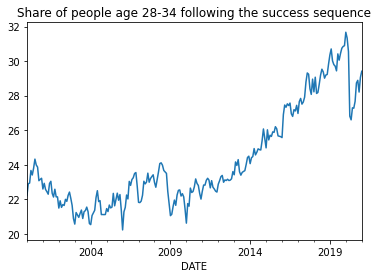

In [16]:
(marriage - following).plot(title='Share of people age 28-34 following the success sequence');

In [18]:
marriage

DATE
2000-01-01    46.438822
2000-02-01    46.599177
2000-03-01    47.326820
2000-04-01    47.707620
2000-05-01    48.037812
                ...    
2020-09-01    50.712535
2020-10-01    50.972669
2020-11-01    50.713581
2020-12-01    51.683579
2021-01-01    51.363540
Name: 0, Length: 253, dtype: float64

In [19]:
file = '/home/brian/Documents/CPS/data/clean/'
cols = ['YEAR', 'MONTH', 'AGE', 'FEMALE', 'EDUC', 'LFS', 'HRSUSL1I', 
        'CPSID', 'MARRIED', 'BASICWGT', 'WORKFT', 'PRCHLD']

kids = [3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

df = pd.concat([pd.read_feather(f'{file}cps{year}.ft', columns=cols) for year in range(2000, 2022)])
ss = lambda x: np.where(((x.AGE >= 28) & (x.AGE <= 34) & (x.MARRIED == 1) & 
                        (x.LFS == "Employed") & (x.EDUC != "LTHS") & (~x.PRCHLD.isin(kids))), 1, 
                        np.where((x.AGE >= 28) & (x.AGE <= 34), 0, np.nan))
df = df.assign(SS = ss)
ss_rate = (lambda grp: np.average(grp.SS, weights=grp.BASICWGT))
agegroup = df[df.SS.notnull()]
data = (agegroup.groupby(['YEAR', 'MONTH']).apply(ss_rate)).reset_index()
data['DATE'] = pd.to_datetime(dict(year=data.YEAR, month=data.MONTH, day=1))
data = data.set_index('DATE').drop(['YEAR', 'MONTH'], axis=1) * 100

workft = data[0]

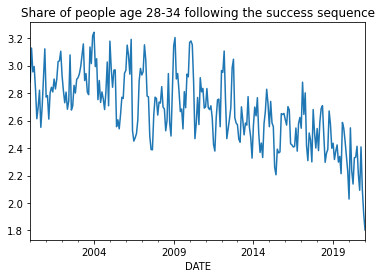

In [21]:
(workft - following).plot(title='Share of people age 28-34 following the success sequence');

In [22]:
file = '/home/brian/Documents/CPS/data/clean/'
cols = ['YEAR', 'MONTH', 'AGE', 'FEMALE', 'EDUC', 'LFS', 'HRSUSL1I', 
        'CPSID', 'MARRIED', 'BASICWGT', 'WORKFT', 'PRCHLD']

kids = [3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

df = pd.concat([pd.read_feather(f'{file}cps{year}.ft', columns=cols) for year in range(2000, 2022)])
ss = lambda x: np.where(((x.AGE >= 28) & (x.AGE <= 34) & (x.MARRIED == 1) & 
                        (x.EDUC != "LTHS") & (~x.PRCHLD.isin(kids))), 1, 
                        np.where((x.AGE >= 28) & (x.AGE <= 34), 0, np.nan))
df = df.assign(SS = ss)
ss_rate = (lambda grp: np.average(grp.SS, weights=grp.BASICWGT))
agegroup = df[df.SS.notnull()]
data = (agegroup.groupby(['YEAR', 'MONTH']).apply(ss_rate)).reset_index()
data['DATE'] = pd.to_datetime(dict(year=data.YEAR, month=data.MONTH, day=1))
data = data.set_index('DATE').drop(['YEAR', 'MONTH'], axis=1) * 100

emp = data[0]

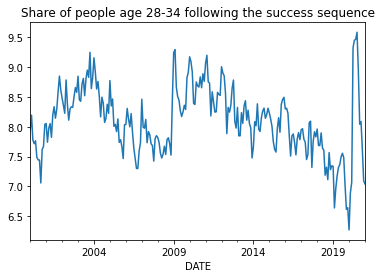

In [23]:
(emp - following).plot(title='Share of people age 28-34 following the success sequence');

In [24]:
file = '/home/brian/Documents/CPS/data/clean/'
cols = ['YEAR', 'MONTH', 'AGE', 'FEMALE', 'EDUC', 'LFS', 'HRSUSL1I', 
        'CPSID', 'MARRIED', 'BASICWGT', 'WORKFT', 'PRCHLD']

kids = [3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

df = pd.concat([pd.read_feather(f'{file}cps{year}.ft', columns=cols) for year in range(2000, 2022)])
ss = lambda x: np.where(((x.AGE >= 28) & (x.AGE <= 34) & (x.MARRIED == 1) & 
                        (x.LFS == "Employed") & (~x.PRCHLD.isin(kids)) &
                        (x.HRSUSL1I > 34)), 1, 
                        np.where((x.AGE >= 28) & (x.AGE <= 34), 0, np.nan))
df = df.assign(SS = ss)
ss_rate = (lambda grp: np.average(grp.SS, weights=grp.BASICWGT))
agegroup = df[df.SS.notnull()]
data = (agegroup.groupby(['YEAR', 'MONTH']).apply(ss_rate)).reset_index()
data['DATE'] = pd.to_datetime(dict(year=data.YEAR, month=data.MONTH, day=1))
data = data.set_index('DATE').drop(['YEAR', 'MONTH'], axis=1) * 100
educ = data[0]

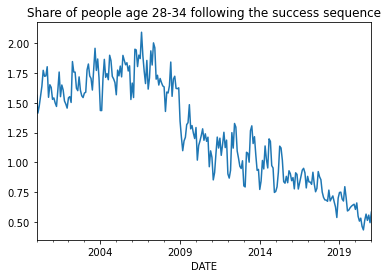

In [25]:
(educ - following).plot(title='Share of people age 28-34 following the success sequence');

In [26]:
file = '/home/brian/Documents/CPS/data/clean/'
cols = ['YEAR', 'MONTH', 'AGE', 'FEMALE', 'EDUC', 'LFS', 'HRSUSL1I', 
        'CPSID', 'MARRIED', 'BASICWGT', 'WORKFT', 'PRCHLD']

kids = [3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

df = pd.concat([pd.read_feather(f'{file}cps{year}.ft', columns=cols) for year in range(2000, 2022)])
ss = lambda x: np.where(((x.AGE >= 28) & (x.AGE <= 34) & (x.MARRIED == 1) & 
                        (x.LFS == "Employed") & (x.EDUC != "LTHS") &
                        (x.HRSUSL1I > 34)), 1, 
                        np.where((x.AGE >= 28) & (x.AGE <= 34), 0, np.nan))
df = df.assign(SS = ss)
ss_rate = (lambda grp: np.average(grp.SS, weights=grp.BASICWGT))
agegroup = df[df.SS.notnull()]
data = (agegroup.groupby(['YEAR', 'MONTH']).apply(ss_rate)).reset_index()
data['DATE'] = pd.to_datetime(dict(year=data.YEAR, month=data.MONTH, day=1))
data = data.set_index('DATE').drop(['YEAR', 'MONTH'], axis=1) * 100

kids = data[0]

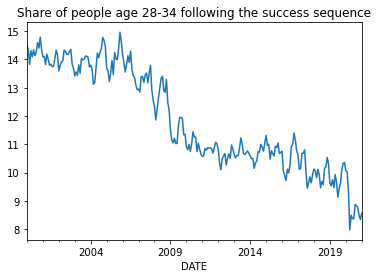

In [27]:
(kids - following).plot(title='Share of people age 28-34 following the success sequence');

In [38]:
final = pd.DataFrame([kids - following, educ - following, 
                      emp - following, workft - following, 
                      marriage - following]).T
final.columns = ['Kids', 'Educ', 'Emp', 'Workft', 'Marriage']

<AxesSubplot:xlabel='DATE'>

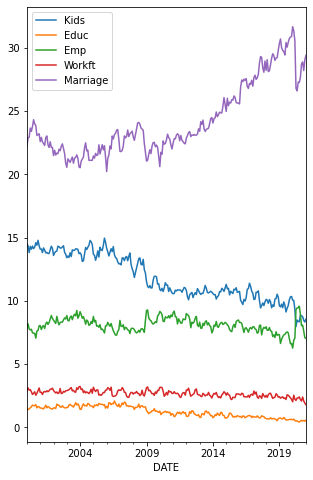

In [41]:
final.plot(figsize=(5, 8))